In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import  classification_report
from sklearn.ensemble import RandomForestClassifier


In [ ]:
#uploading file

from google.colab import files
uploaded = files.upload()


Saving UNSW_NB15_training-set.csv to UNSW_NB15_training-set.csv


In [ ]:
#uploading file
from google.colab import files
uploaded = files.upload()

Saving UNSW_NB15_testing-set.csv to UNSW_NB15_testing-set.csv


In [ ]:
# Reading the UNSW-NB15 training and testing datasets into Pandas DataFrames
training = pd.read_csv('UNSW_NB15_training-set.csv')
testing = pd.read_csv('UNSW_NB15_testing-set.csv')

In [ ]:
# Displaying the dimensions (rows and columns) of the training and testing datasets
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


In [ ]:
all(training.columns == testing.columns)

True

In [ ]:
# Concatenating the training and testing datasets, dropping the 'id' column, and resetting the index of the combined DataFrame

df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
df.shape

(257673, 44)

In [ ]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [ ]:
# Checking null values
df.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

[0 1]
label
1    164673
0     93000
Name: count, dtype: int64


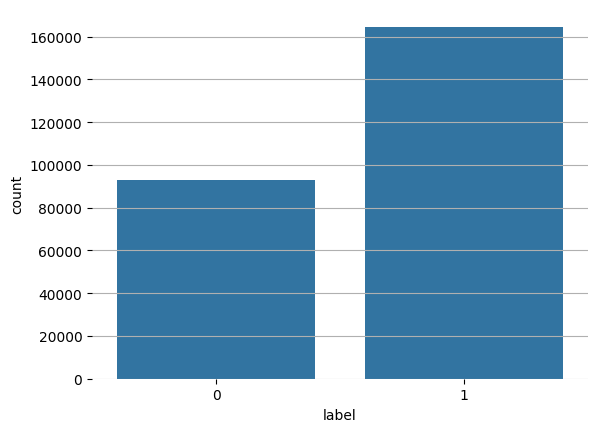

In [ ]:
print(df['label'].unique())
print(df['label'].value_counts())
# Countplot to visualize the distribution of botnet attacks
ax = sns.countplot(x='label', data=df)

# Adding grid lines along the y-axis
ax.yaxis.grid(True)

# Removing spines to declutter the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.show()

In [ ]:
# Retrieving unique values present in the 'attack_cat' column of the DataFrame
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

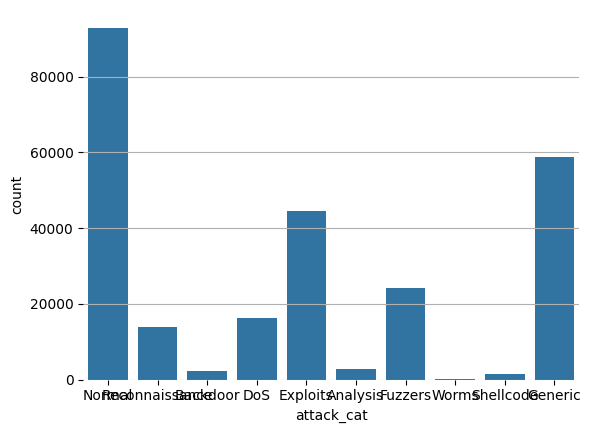

In [ ]:
# Countplot to visualize the distribution of botnet attacks
ax = sns.countplot(x='attack_cat', data=df)
sns.set(rc={'figure.figsize':(12, 6)})
# Adding grid lines along the y-axis
ax.yaxis.grid(True)

# Removing spines to declutter the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Show the plot
plt.show()

In [ ]:
# Counting and visualizing the distribution of attack categories for labeled (label=1) data using a pie chart
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

plt.figure(figsize = (15,8))
#plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

attack_cat
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: count, dtype: int64


<Figure size 1500x800 with 0 Axes>

In [ ]:
#Performing label encoding to convert categorical data to numerical data
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes

df['attack_cat'] = df['attack_cat'].astype('category')

In [ ]:
df.head()


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [ ]:
df.shape

(257673, 44)

In [ ]:
# scaling the features using standardization
X = df.drop(columns = ['attack_cat', 'label'])
y = df['label'].values

scaler = StandardScaler() # standardizes a feature by subtracting the mean and then scaling to unit variance

X = scaler.fit_transform(X) # scaling training data and learning scaling parameters of data.

X = pd.DataFrame(X, columns=['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'])
X.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,-0.208678,0.415177,-0.692762,0.742077,-0.130765,-0.165331,-0.046480,-0.098409,-0.002151,0.722026,...,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.654825,-0.120335
1,-0.208679,0.415177,-0.692762,0.742077,-0.130765,-0.165331,-0.039194,-0.098409,0.210460,0.722026,...,-0.617890,-0.519345,-0.520051,-0.568574,-0.110419,-0.110372,-0.193597,-0.690790,-0.654825,-0.120335
2,-0.208679,0.415177,-0.692762,0.742077,-0.130765,-0.165331,-0.043188,-0.098409,0.678204,0.722026,...,-0.617890,-0.519345,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.690790,-0.562869,-0.120335
3,-0.208679,0.415177,-0.692762,0.742077,-0.130765,-0.165331,-0.044155,-0.098409,0.470318,0.722026,...,-0.495547,-0.396808,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.562869,-0.120335
4,-0.208678,0.415177,-0.692762,0.742077,-0.130765,-0.165331,-0.037100,-0.098409,0.054546,0.722026,...,-0.495547,-0.396808,-0.520051,-0.478652,-0.110419,-0.110372,-0.193597,-0.571689,-0.562869,-0.120335


In [ ]:

#Splitting the data into training and testing and then dispalying their dimesnions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


Logistic Regression

In [ ]:
# Logistic Regression
# fitting linear model with coefficients to minimize residual sum of squares between the observed targets
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.90


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.78      0.85     27814
           1       0.89      0.97      0.93     49488

    accuracy                           0.90     77302
   macro avg       0.91      0.87      0.89     77302
weighted avg       0.90      0.90      0.90     77302





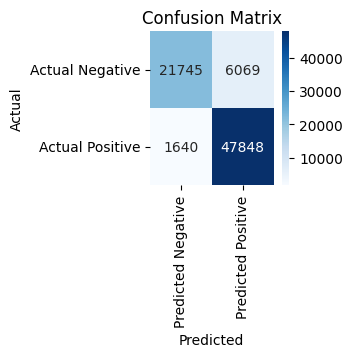

In [ ]:
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy:.2f}")
print('\n')
# Print classification report (precision, recall, f1-score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))
print('\n')
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(2, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Decision Tree

In [ ]:
# Decision Tree
dectree = DecisionTreeClassifier()
dectree.fit(X_train,y_train)

DecisionTreeClassifier()

Accuracy: 0.94


Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91     27814
           1       0.95      0.95      0.95     49488

    accuracy                           0.94     77302
   macro avg       0.93      0.93      0.93     77302
weighted avg       0.94      0.94      0.94     77302





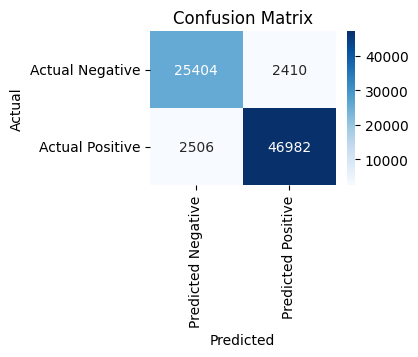

In [ ]:

y_pred_dectree = dectree.predict(X_test)


# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred_dectree)
print(f"Accuracy: {accuracy:.2f}")
print('\n')

print("Classification Report:")
print(classification_report(y_test, y_pred_dectree))
print('\n')
cm = confusion_matrix(y_test, y_pred_dectree)
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Random Forest

In [ ]:
#Applying random forest

# Initialize Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     27814
           1       0.96      0.96      0.96     49488

    accuracy                           0.95     77302
   macro avg       0.95      0.95      0.95     77302
weighted avg       0.95      0.95      0.95     77302



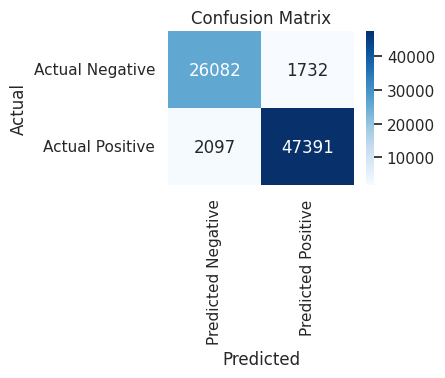

In [ ]:
# predictions on the test set
y_pred_random = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_random)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred_random))
cm = confusion_matrix(y_test,y_pred_random )
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

XgBoost

Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93     27814
           1       0.97      0.95      0.96     49488

    accuracy                           0.95     77302
   macro avg       0.94      0.95      0.94     77302
weighted avg       0.95      0.95      0.95     77302



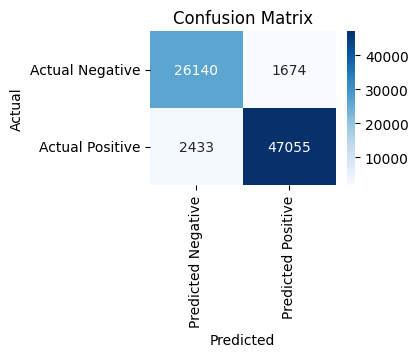

In [ ]:

# Initialize XGBoost Classifier
clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report (precision, recall, f1-score, etc.)
print("Classification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred )
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Ensembling Method Max Voting using Logistic Regression and Decision Tree

Ensemble Accuracy: 0.9279449432097487
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     27814
           1       0.96      0.93      0.94     49488

    accuracy                           0.93     77302
   macro avg       0.92      0.93      0.92     77302
weighted avg       0.93      0.93      0.93     77302

Confusion Matrix:


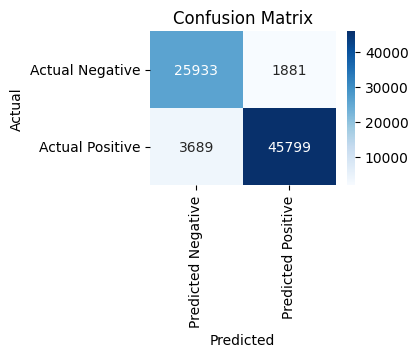

In [ ]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Train the classifiers
decision_tree_classifier.fit(X_train, y_train)
logistic_classifier.fit(X_train, y_train)

# Make predictions
decision_tree_predictions = decision_tree_classifier.predict(X_test)
logistic_predictions = logistic_classifier.predict(X_test)

# Implement Max Votingd
def max_voting(predictions):
    return np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)

# Aggregate predictions using Max Voting
ensemble_predictions = max_voting([decision_tree_predictions, logistic_predictions])

# Evaluate ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

binary_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Calculate classification report
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

# Calculate confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test,binary_predictions )
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Ensembling Method Averaging Using Logistic Regression, Decision Tree and KNN.

Ensemble Accuracy: 0.9307650513570154
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90     27814
           1       0.93      0.96      0.95     49488

    accuracy                           0.93     77302
   macro avg       0.93      0.92      0.92     77302
weighted avg       0.93      0.93      0.93     77302

Confusion Matrix:


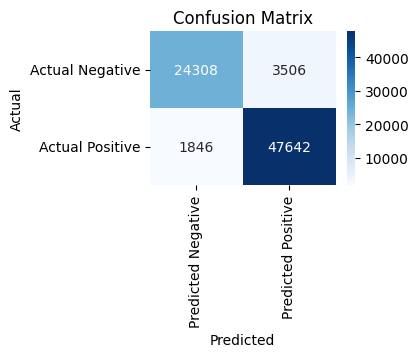

In [ ]:
# Initialize classifiers
logistic_classifier = LogisticRegression(max_iter=1000, random_state=42)
knn_classifier = KNeighborsClassifier()
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifiers
logistic_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)

logistic_predictions = logistic_classifier.predict(X_test)
knn_predictions = knn_classifier.predict(X_test)
decision_tree_predictions = decision_tree_classifier.predict(X_test)

# Implement Averaging
def averaging(predictions):
    return sum(predictions) / len(predictions)

# Aggregate predictions using Averaging
ensemble_predictions = averaging([logistic_predictions, knn_predictions, decision_tree_predictions])

ensemble_predictions_rounded = [round(pred) for pred in ensemble_predictions]

# Evaluate ensemble model
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions_rounded)
print("Ensemble Accuracy:", ensemble_accuracy)

binary_predictions = [1 if pred >= 0.5 else 0 for pred in ensemble_predictions]

# Calculate classification report
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

# Calculate confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test,binary_predictions )
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Applying the deep learning models

Epoch 1/10
2577/2577 [==============================] - 29s 11ms/step - loss: 0.1812 - accuracy: 0.9140 - val_loss: 0.1491 - val_accuracy: 0.9276
Epoch 2/10
2577/2577 [==============================] - 26s 10ms/step - loss: 0.1509 - accuracy: 0.9265 - val_loss: 0.1448 - val_accuracy: 0.9268
Epoch 3/10
2577/2577 [==============================] - 26s 10ms/step - loss: 0.1461 - accuracy: 0.9293 - val_loss: 0.1405 - val_accuracy: 0.9306
Epoch 4/10
2577/2577 [==============================] - 24s 9ms/step - loss: 0.1425 - accuracy: 0.9302 - val_loss: 0.1382 - val_accuracy: 0.9319
Epoch 5/10
2577/2577 [==============================] - 27s 10ms/step - loss: 0.1398 - accuracy: 0.9318 - val_loss: 0.1370 - val_accuracy: 0.9325
Epoch 6/10
2577/2577 [==============================] - 26s 10ms/step - loss: 0.1383 - accuracy: 0.9319 - val_loss: 0.1358 - val_accuracy: 0.9330
Epoch 7/10
2577/2577 [==============================] - 25s 10ms/step - loss: 0.1368 - accuracy: 0.9324 - val_loss: 0.1336 - 

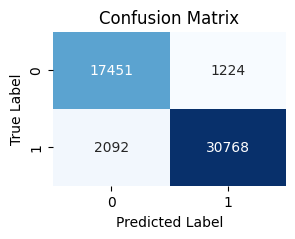

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models



# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape input data for CNN
X_train_cnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val_cnn = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_cnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
model = models.Sequential([
    layers.Reshape((X_train.shape[1], 1), input_shape=(X_train.shape[1],)),
    layers.Conv1D(32, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Conv1D(64, 3, activation='relu'),
    layers.MaxPooling1D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels based on a threshold (e.g., 0.5)
y_pred_labels = (y_pred_prob >= 0.5).astype(int)

# Generate a classification report
print(classification_report(y_test, y_pred_labels))
cm = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Epoch 1/10
2577/2577 [==============================] - 60s 22ms/step - loss: 0.2160 - accuracy: 0.8981 - val_loss: 0.1711 - val_accuracy: 0.9207
Epoch 2/10
2577/2577 [==============================] - 60s 23ms/step - loss: 0.1754 - accuracy: 0.9142 - val_loss: 0.1571 - val_accuracy: 0.9208
Epoch 3/10
2577/2577 [==============================] - 58s 23ms/step - loss: 0.1678 - accuracy: 0.9169 - val_loss: 0.1642 - val_accuracy: 0.9195
Epoch 4/10
2577/2577 [==============================] - 57s 22ms/step - loss: 0.1630 - accuracy: 0.9192 - val_loss: 0.1735 - val_accuracy: 0.9100
Epoch 5/10
2577/2577 [==============================] - 59s 23ms/step - loss: 0.1595 - accuracy: 0.9200 - val_loss: 0.1568 - val_accuracy: 0.9256
Epoch 6/10
2577/2577 [==============================] - 61s 24ms/step - loss: 0.1577 - accuracy: 0.9218 - val_loss: 0.1456 - val_accuracy: 0.9272
Epoch 7/10
2577/2577 [==============================] - 58s 22ms/step - loss: 0.1546 - accuracy: 0.9232 - val_loss: 0.1460 -

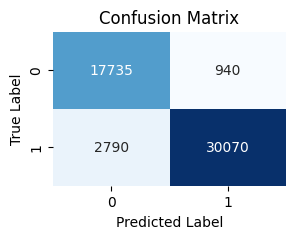

In [ ]:
X_train_rnn = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val_rnn = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test_rnn = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the RNN model
model = models.Sequential([
    layers.SimpleRNN(32, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), return_sequences=True),
    layers.Dropout(0.2),
    layers.SimpleRNN(32),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_rnn, y_train, epochs=10, batch_size=64, validation_data=(X_val_rnn, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_rnn, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels based on a threshold (e.g., 0.5)
y_pred_labels = (y_pred_prob >= 0.5).astype(int)

# Generate a classification report
print(classification_report(y_test, y_pred_labels))
cm = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(3, 2))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()